In [38]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import h5py
from pathlib import Path
import os
import sys
sys.path.append(os.getcwd() + '/../..')
sys.path.append(os.getcwd() + '/..')
from filepaths import filepath_from_ml_artifacts_uri
from analysis.iclr.plotting import settings, fig_size, cb_line_cycler, cb_line_cycler_solid, cb_marker_cycler, savefig
from plot_hdf5_dataset import plot_dataset
from iclr_paper_path import get_paper_path
import matplotlib
settings()
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
path = filepath_from_ml_artifacts_uri('mlflow-artifacts:/799837826878041253/7101880dc4074ad4bfae482e4cc1709c/artifacts/dataset.hdf5')
file = h5py.File(path, 'r')
train_set_path = filepath_from_ml_artifacts_uri('mlflow-artifacts:/829789035554334690/2ca1dc3ab4ca4fda96dc072fea11451f/artifacts/dataset.hdf5')
train_file = h5py.File(train_set_path, 'r')

def calculate_normed_loss(file, train_file):
    # calculate norms
    var_states = train_file['train']['states'][:].std(axis=(0, 2))
    mean_states = train_file['train']['states'][:].mean(axis=(0, 2))
    var_outputs = train_file['train']['outputs'][:].std(axis=(0, 2))
    mean_outputs = train_file['train']['outputs'][:].mean(axis=(0, 2))
    
    # normalize
    x = file['common_test']['states'][:]
    xhat = file['common_test']['states_hat'][:]
    y = file['common_test']['outputs'][:]
    yhat = file['common_test']['outputs_hat'][:]
    
    var_states = np.expand_dims(var_states, axis=(0, 2))
    mean_states = np.expand_dims(mean_states, axis=(0, 2))
    var_outputs = np.expand_dims(var_outputs, axis=(0, 2))
    mean_outputs = np.expand_dims(mean_outputs, axis=(0, 2))

    # x = (x - mean_states) / var_states
    # xhat = (xhat - mean_states) / var_states
    # y = (y - mean_outputs) / var_outputs
    # yhat = (yhat - mean_outputs) / var_outputs
    x = x /mean_states
    xhat = xhat / mean_states
    y = y / mean_outputs
    yhat = yhat / mean_outputs

    # calculate loss
    # loss = np.square(y - yhat).mean(axis=(1,2)) + np.square(x - xhat).mean(axis=(1,2)).sqrt()
    max_error = np.sqrt(np.square(x - xhat).max())
    rmse_states = np.sqrt(np.square(x - xhat).mean(axis=(1,2)))
    rmse_outputs = np.sqrt(np.square(y - yhat).mean(axis=(1,2)))
    loss = rmse_states #+ rmse_outputs
    return loss, max_error

loss, max_error = calculate_normed_loss(file, train_file)
loss = loss *100
max_error = max_error * 100

n_samples = len(loss)

In [40]:
max_error

30.113607587174783

Text(4.99, 0.9, 'max. RMSE: 1.29')

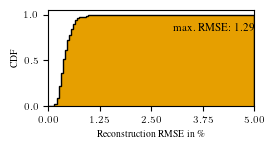

In [41]:
# make histogram of loss
min = 0
max = 5
fig, ax = plt.subplots(1,1, figsize = fig_size(1.5, n_figs_per_width=2), tight_layout=True)
ax.set_prop_cycle(cb_line_cycler)
bins = np.linspace(0, max, 100)
ax.hist(loss, bins=bins, density=True, cumulative=True, )
ax.hist(loss, bins=bins, density=True, cumulative=True, histtype='step', linewidth=1, color='black')
ax.set_xlabel('Reconstruction RMSE in \%')
ax.set_ylabel('CDF')
ax.set_xlim([0, max])
ax.set_xticks(np.linspace(0, max, 5))
# ax.set_ylim([0, 1])
# plot max loss as text in top right
max_loss = np.max(loss)
ax.text(max - 0.01, 0.9, f'max. RMSE: {max_loss:.2f}', verticalalignment='top', horizontalalignment='right', fontsize=8)

# savefig(fig, '../../../../latex/thesis_chapters/figures/Analysis/LODE_Step_Freq/LODE_SHF_c-RS_loss_hist', pgf=False)

In [42]:
# get id of max loss
max_loss_id = np.argmax(loss)
print(max_loss_id)
# get id of second max loss
second_max_loss_id = np.argsort(loss)[-2]
print(second_max_loss_id)
# get id of median loss
median_loss_id = np.argsort(loss)[len(loss)//2]
print(median_loss_id)
# get id of min loss
min_loss_id = np.argmin(loss)
print(min_loss_id)

308
112
395
65


finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\code
e:\projects\balanced_neural_odes_internal
finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\code
e:\projects\balanced_neural_odes_internal
finding path that contains "code", then going up one level to find "LaTeX"
e:\projects\balanced_neural_odes_internal\code\python\analysis\iclr
e:\projects\balanced_neural_odes_internal\code\python\analysis
e:\projects\balanced_neural_odes_internal\code\python
e:\projects\balanced_neural_odes_internal\

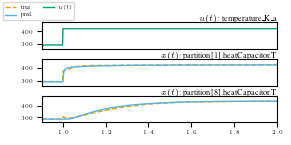

E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_max_loss.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_max_loss.svg


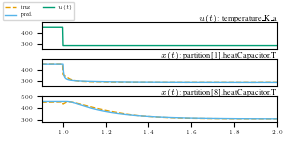

E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_second_max_loss.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_second_max_loss.svg


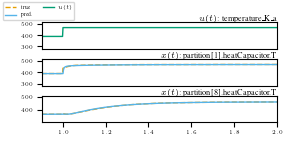

E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_median_loss.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_median_loss.svg


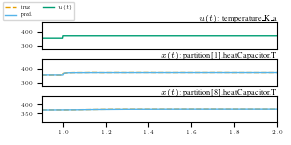

E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_min_loss.png
E:\projects\balanced_neural_odes_internal\LaTeX\ICLR 2025 Template\figures\BNODE\SHF\trajectory_beta_0_1_min_loss.svg


In [45]:
def make_path(name):
    # return '../../../../latex/thesis_chapters/figures/Analysis/LODE_Step_Freq/LODE_SHF_c-RS' + name
    return get_paper_path('BNODE', 'SHF', 'trajectory_beta_0_1_' + name)
for sample_id, save_path in zip([max_loss_id, second_max_loss_id, median_loss_id, min_loss_id], [make_path('max_loss'), make_path('second_max_loss'), make_path('median_loss'), make_path('min_loss')]):
    dataset_type = 'common_test'
    sample_id = sample_id
    size = fig_size(1.3, n_figs_per_width=2)
    controls = ['temperature_K_a']
    states = ['stratifiedHeatFlow.partition[1].heatCapacitor.T','stratifiedHeatFlow.partition[8].heatCapacitor.T']
    display_states = ['partition[1].heatCapacitor.T', 'partition[8].heatCapacitor.T',]
    outputs = [] 
    parameters = False
    fig, ax = plot_dataset(file,
                dataset_type=dataset_type,
                sample_id=sample_id,
                figsize=size,
                fontsize=6,
                linewidth=1.0,
                controls=controls,
                states=states,
                outputs=outputs,
                parameters=parameters,
                ylim_range=95,
                save_path=None,
                display_states=display_states,
    )
    _loss = loss.mean()
    str = 'RMSE' + f'={_loss:.1f}\%' + '\n' + 'max  ' + f'={max_error:.1f}\% (test set; {n_samples} samples)'
    ax[0].text(0.20, 1.0, str, horizontalalignment='left', verticalalignment='bottom', transform=ax[0].transAxes, fontsize=5)
    savefig(fig, save_path)

In [44]:
loss.shape

(461,)